In [1]:
import pickle
import pandas as pd
import numpy as np

In [5]:

with open('../simulation/results/simu_metric_gauss.pkl', 'rb') as f:
    metric_blocks = pickle.load(f)

In [26]:
results_df = pd.DataFrame(metric_blocks)
results_df.loc[results_df['metric'] == 'mean_squared_error', 'metric'] = 'rmse'
results_df['score'] = np.sqrt(results_df['score'])
res = results_df.groupby(['model', 'metric','n','signal_name','snr']).mean().reset_index()
# = np.sqrt(results_df['score'])
# res = results_df.groupby(['model', 'metric','n','signal_name','snr']).std().reset_index()
res

,model,metric,n,signal_name,snr,rep,seed,score,run_time
0,VEBTF-ash_update,mean_absolute_error,1024,gauss,3.0,9.5,9.5,0.392622,0.253275
1,VEBTF-ash_update,rmse,1024,gauss,3.0,9.5,9.5,0.196210,0.253275
2,genlasso_tf0,mean_absolute_error,1024,gauss,3.0,9.5,9.5,0.406887,6.295836
3,genlasso_tf0,rmse,1024,gauss,3.0,9.5,9.5,0.230801,6.295836
4,haar_BayesShrink,mean_absolute_error,1024,gauss,3.0,9.5,9.5,0.513645,0.000848
5,haar_BayesShrink,rmse,1024,gauss,3.0,9.5,9.5,0.394811,0.000848
6,haar_VisuShrink,mean_absolute_error,1024,gauss,3.0,9.5,9.5,0.425080,0.001200
7,haar_VisuShrink,rmse,1024,gauss,3.0,9.5,9.5,0.267883,0.001200
8,susie_tf10,mean_absolute_error,1024,gauss,3.0,9.5,9.5,0.419265,2.746387
9,susie_tf10,rmse,1024,gauss,3.0,9.5,9.5,0.247798,2.746387


In [17]:
results_df = pd.DataFrame(metric_blocks)
results_df.loc[results_df['metric'] == 'mean_squared_error', 'metric'] = 'rmse'
results_df['score'] = np.sqrt(results_df['score'])
res = results_df.groupby(['model', 'metric','n','signal_name','snr']).std().reset_index()
# = np.sqrt(results_df['score'])
# res = results_df.groupby(['model', 'metric','n','signal_name','snr']).std().reset_index()
res

,model,metric,n,signal_name,snr,rep,seed,score,run_time
0,VEBTF-ash_update,mean_absolute_error,1024,bumps,3.0,5.91608,5.91608,0.023815,0.236262
1,VEBTF-ash_update,rmse,1024,bumps,3.0,5.91608,5.91608,0.032836,0.236262
2,genlasso_tf0,mean_absolute_error,1024,bumps,3.0,5.91608,5.91608,0.017389,0.388084
3,genlasso_tf0,rmse,1024,bumps,3.0,5.91608,5.91608,0.028749,0.388084
4,haar_BayesShrink,mean_absolute_error,1024,bumps,3.0,5.91608,5.91608,0.025541,0.000154
5,haar_BayesShrink,rmse,1024,bumps,3.0,5.91608,5.91608,0.049847,0.000154
6,haar_VisuShrink,mean_absolute_error,1024,bumps,3.0,5.91608,5.91608,0.025271,0.001428
7,haar_VisuShrink,rmse,1024,bumps,3.0,5.91608,5.91608,0.033216,0.001428
8,susie_tf10,mean_absolute_error,1024,bumps,3.0,5.91608,5.91608,0.018100,0.216683
9,susie_tf10,rmse,1024,bumps,3.0,5.91608,5.91608,0.054324,0.216683


In [6]:
signal_names = ['gauss', 'heavi', 'step', 'blocks', 'bumps', 'linear']
final_df = None
for signal_name in signal_names:
    with open(f'../simulation/results/simu_metric_{signal_name}.pkl', 'rb') as f:
        metric_blocks = pickle.load(f)
        results_df = pd.DataFrame(metric_blocks)
        results_df.loc[results_df['metric'] == 'mean_squared_error', 'metric'] = 'rmse'
        results_df['score'] = np.sqrt(results_df['score'])
        res = results_df.groupby(['model', 'metric','n','signal_name','snr']).mean().reset_index()
        res = res[res['metric'] == 'rmse']
        if final_df is None:
            final_df = res
        else:  
            final_df = pd.concat([final_df, res])

In [73]:
final_df = final_df.drop(['metric','signal_name'], axis=1)

In [74]:
final_res = final_df.groupby(['model']).mean().reset_index()

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
final_res['model'] = final_res['model'].replace({'VEBTF-ash_update': 'EBTF', 'genlasso_tf0': 'genlasso-tf', 'haar_BayesShrink': 'Wave-Bayes', 'haar_VisuShrink': 'Wave-hard', 'susie_tf10': 'susie-tf-10', 'susie_tf20': 'susie-tf-20'})


In [77]:
final_res

,model,n,snr,rep,seed,score,run_time
0,EBTF,1024.0,3.0,9.5,9.5,0.244693,0.666607
1,genlasso-tf,1024.0,3.0,9.5,9.5,0.287855,6.280387
2,Wave-Bayes,1024.0,3.0,9.5,9.5,0.529733,0.000841
3,Wave-hard,1024.0,3.0,9.5,9.5,0.404369,0.001154
4,susie-tf-10,1024.0,3.0,9.5,9.5,0.459524,4.295960
5,susie-tf-20,1024.0,3.0,9.5,9.5,0.364815,10.597901


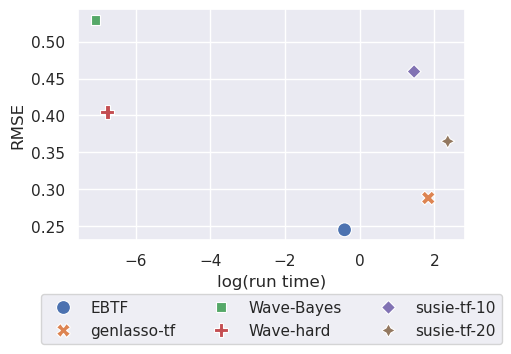

In [78]:
sns.set(style="darkgrid")
plt.figure(figsize=(5, 3))
sns.scatterplot(data=final_res, x=np.log(final_res['run_time']), 
                y=final_res['score'], hue=final_res['model'], 
                style=final_res['model'],
                markers=True, s=100)
plt.ylabel('RMSE')
plt.xlabel('log(run time)')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.savefig('simu_metric_summary.pdf', bbox_inches='tight')
plt.show()
